In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('../spectra/')
import spectra

Loading file ... 
../test_data/ir.csv
Peak width of about 0.9643 (in x-data units)


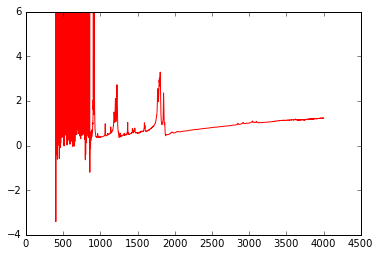

In [6]:
S = spectra.Spectra('../test_data/ir.csv')
plt.plot(S.x,S.y,'r-')

270 270


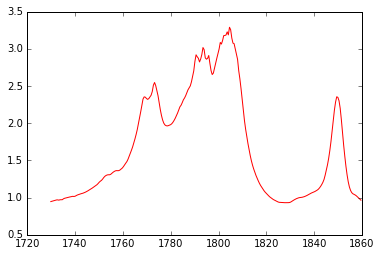

In [7]:
S.crop(1730,1860)
plt.plot(S.x,S.y,'r-')
print len(S.x), len(S.y)

Finding background ... 


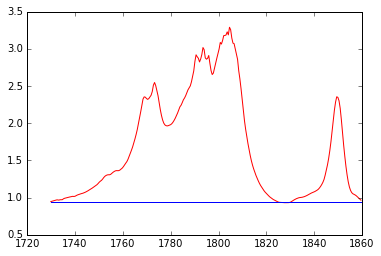

In [8]:
S.find_background(cutoff=1/50000, order=1)
plt.plot(S.x,S.y,'r-',S.x,S.bg,'b-')

Subtracting background ... 


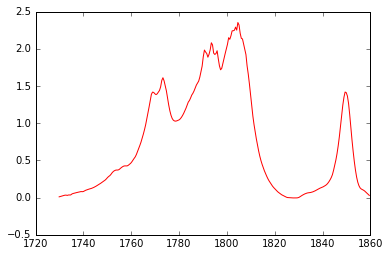

In [9]:
S.subtract_background()
plt.plot(S.x,S.y,'r-')

Looking for peaks ... 
Found 4 peaks at [85, 128, 156, 248]
After filtering out peaks below  2 percent, we have  4  peaks.
Using  4  peaks at  [85, 128, 156, 248]


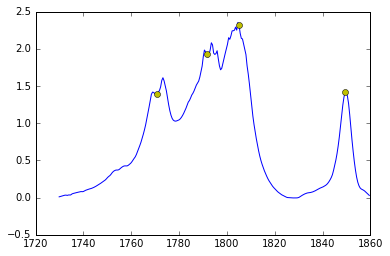

In [10]:
S.set_peak_width(5)
S.find_peaks(threshold=2)
plt.plot(S.x,S.y,'b-',S.x[S.peak_pos],S.y[S.peak_pos],'oy')

In [11]:
S.build_model(peak_type='LO', bg_ord=2)

Building model ... 
Peak 0: pos 1770.844, height 1.39465218019
Peak 1: pos 1791.575, height 1.93658623653
Peak 2: pos 1805.075, height 2.32002609207
Peak 3: pos 1849.43, height 1.41883817554


(Parameters([('bg_c0', <Parameter 'bg_c0', 0, bounds=[-inf:inf]>),
             ('bg_c1', <Parameter 'bg_c1', 0, bounds=[-inf:inf]>),
             ('bg_c2', <Parameter 'bg_c2', 0, bounds=[-inf:inf]>),
             ('p0_sigma', <Parameter 'p0_sigma', 2.5, bounds=[1.25:10]>),
             ('p0_center',
              <Parameter 'p0_center', 1770.8440000000001, bounds=[-inf:inf]>),
             ('p0_amplitude',
              <Parameter 'p0_amplitude', 10.953572609024448, bounds=[-inf:inf]>),
             ('p1_sigma', <Parameter 'p1_sigma', 2.5, bounds=[1.25:10]>),
             ('p1_center',
              <Parameter 'p1_center', 1791.575, bounds=[-inf:inf]>),
             ('p1_amplitude',
              <Parameter 'p1_amplitude', 15.209912734332239, bounds=[-inf:inf]>),
             ('p2_sigma', <Parameter 'p2_sigma', 2.5, bounds=[1.25:10]>),
             ('p2_center',
              <Parameter 'p2_center', 1805.075, bounds=[-inf:inf]>),
             ('p2_amplitude',
              <Parameter 

In [12]:
S.fit_data()

Fitting Data...
[[Model]]
    ((((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_'))
[[Fit Statistics]]
    # function evals   = 179
    # data points      = 270
    # variables        = 15
    chi-square         = 1.260
    reduced chi-square = 0.005
    Akaike info crit   = -1403.658
    Bayesian info crit = -1349.682
[[Variables]]
    bg_c0:          60.1667041 +/- 31.37424 (52.15%) (init= 0)
    bg_c1:         -0.06540557 +/- 0.035164 (53.76%) (init= 0)
    bg_c2:          1.7704e-05 +/- 9.85e-06 (55.62%) (init= 0)
    p0_sigma:       8.08347408 +/- 0.329366 (4.07%) (init= 2.5)
    p0_center:      1771.11709 +/- 0.159940 (0.01%) (init= 1770.844)
    p0_amplitude:   33.7804383 +/- 1.733590 (5.13%) (init= 10.95357)
    p1_sigma:       8.52895925 +/- 0.429732 (5.04%) (init= 2.5)
    p1_center:      1792.24244 +/- 0.201036 (0.01%) (init= 1791.575)
    p1_amplitude:  

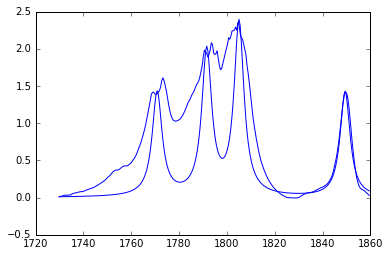

In [13]:
plt.plot(S.x,S.y,'-',S.x,S.out.init_fit,'b-')

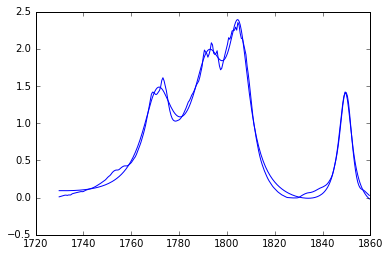

In [14]:
plt.plot(S.x,S.y,'-',S.x,S.out.best_fit,'b-')

In [15]:
S.print_peak_results()

	Position	Height	FWHM
Peak0	1771.12+/-0.16	1.33+/-0.09	16.2+/-0.7
Peak1	1792.24+/-0.20	1.68+/-0.14	17.1+/-0.9
Peak2	1804.99+/-0.11	1.99+/-0.13	11.1+/-0.4
Peak3	1849.55+/-0.07	1.57+/-0.10	6.82+/-0.30


In [16]:
print S.out.fit_report()

[[Model]]
    ((((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_'))
[[Fit Statistics]]
    # function evals   = 179
    # data points      = 270
    # variables        = 15
    chi-square         = 1.260
    reduced chi-square = 0.005
    Akaike info crit   = -1403.658
    Bayesian info crit = -1349.682
[[Variables]]
    bg_c0:          60.1667041 +/- 31.37424 (52.15%) (init= 0)
    bg_c1:         -0.06540557 +/- 0.035164 (53.76%) (init= 0)
    bg_c2:          1.7704e-05 +/- 9.85e-06 (55.62%) (init= 0)
    p0_sigma:       8.08347408 +/- 0.329366 (4.07%) (init= 2.5)
    p0_center:      1771.11709 +/- 0.159940 (0.01%) (init= 1770.844)
    p0_amplitude:   33.7804383 +/- 1.733590 (5.13%) (init= 10.95357)
    p1_sigma:       8.52895925 +/- 0.429732 (5.04%) (init= 2.5)
    p1_center:      1792.24244 +/- 0.201036 (0.01%) (init= 1791.575)
    p1_amplitude:   45.1241895 +/- 

In [17]:
print S.output_results(pandas=True)

                    value     stderr
bg_c0           60.166704  31.374249
bg_c1           -0.065406   0.035165
bg_c2            0.000018   0.000010
p0_sigma         8.083474   0.329367
p0_center     1771.117095   0.159941
p0_amplitude    33.780438   1.733590
p1_sigma         8.528959   0.429732
p1_center     1792.242444   0.201036
p1_amplitude    45.124190   2.844614
p2_sigma         5.527724   0.208051
p2_center     1804.985042   0.107146
p2_amplitude    34.505893   1.889290
p3_sigma         3.408883   0.149845
p3_center     1849.548751   0.068440
p3_amplitude    16.835353   0.800943
